In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

In [24]:
N = 500
dim = 2
classes = 3

In [25]:
means = [[2, 2], [ 8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

In [26]:
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X0

array([[ 2.00644653,  2.49445772],
       [ 1.4016002 ,  1.27405733],
       [ 0.61626042,  3.02364771],
       [ 2.44055956,  1.74262314],
       [ 2.9227336 ,  1.51651591],
       [ 1.54744591,  0.37386362],
       [ 4.38884082,  2.45955067],
       [ 3.41995621,  2.65402327],
       [ 2.53809656,  2.40011512],
       [ 3.56153888,  2.80460108],
       [ 0.54909582,  1.00090965],
       [ 3.17108103,  2.39718194],
       [ 2.55096505,  2.56414904],
       [ 1.99292726,  2.16064155],
       [ 1.33337373,  3.15783986],
       [ 1.60096824,  2.10865899],
       [ 1.60110109,  0.34253613],
       [ 1.90606518,  2.78083332],
       [ 1.84672282,  2.07336405],
       [ 1.2992311 ,  1.06428021],
       [ 1.88587364,  2.36399704],
       [ 1.49938172,  0.5650889 ],
       [ 2.22776972,  1.82380659],
       [ 1.99424453,  2.06188773],
       [ 2.3153838 ,  1.66388673],
       [ 2.91076539,  2.09769264],
       [ 1.24737484, -0.61524717],
       [ 1.01899416,  3.18815645],
       [ 1.44662595,

In [27]:
X = np.row_stack((X0, X1, X2)).T
X

array([[2.00644653, 1.4016002 , 0.61626042, ..., 2.15870695, 1.23278152,
        2.8499969 ],
       [2.49445772, 1.27405733, 3.02364771, ..., 5.95691874, 7.16502011,
        7.30289613]])

In [28]:
ones = np.ones((1, X.shape[1]))
X = np.row_stack((ones, X))
X

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [2.00644653, 1.4016002 , 0.61626042, ..., 2.15870695, 1.23278152,
        2.8499969 ],
       [2.49445772, 1.27405733, 3.02364771, ..., 5.95691874, 7.16502011,
        7.30289613]])

In [38]:
original_labels = np.asarray([0] * N + [1] * N+ [2] * N)
original_labels.shape

(1500,)

In [39]:
def display(X, label): 
    X0 = X[: , label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]

    plt.plot(X0[0, :], X0[1, :], "b^", markersize= 4, alpha = 0.8 )
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

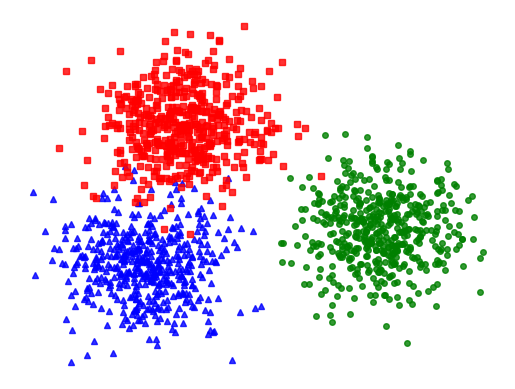

In [41]:
display(X[1:, :], original_labels)

In [45]:
def convert_labels(labels, C):
    ones = np.ones_like(labels)
    Y = sparse.coo_matrix((ones, (labels, np.arange(len(labels)), (C, len(labels)))))

    return Y.toarray()